In [6]:
import scikitplot as skplt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import warnings
warnings.filterwarnings("ignore")
adaboost_model = joblib.load('./ada_model.pkl')
pd.set_option('display.max_columns', None)
plt.rc('font', family='Malgun Gothic')

In [36]:
DeT = [0.75, 0.77, 0.77, 0.77, 0.77, 0.78]
SVC = [0.79, 0.79, 0.79, 0.80, 0.78, 0.53]
XGB = [0.79, 0.79, 0.79, 0.81, 0.78, 0.82]
Niv = [0.71, 0.72, 0.72, 0.71, 0.71, 0.71]
RAF = [0.79, 0.79, 0.79, 0.80, 0.79, 0.79]
Ada = [0.79, 0.79, 0.80, 0.82, 0.79, 0.82]
KNN = [0.77, 0.77, 0.77, 0.78, 0.75, 0.80]

# 데이터프레임 생성
df = pd.DataFrame({
    'DeT': DeT,
    'SVC': SVC,
    'XGB': XGB,
    'Niv': Niv,
    'RAF': RAF,
    'Ada': Ada,
    'KNN': KNN,
})
df.index = range(1, len(df) + 1)

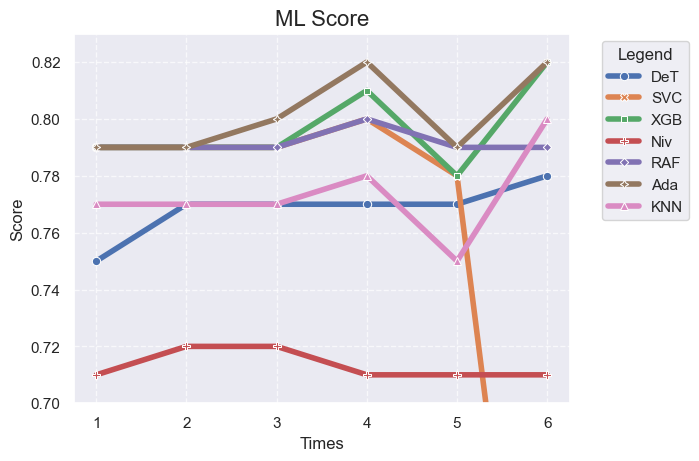

In [38]:
# 선 그래프 그리기
sns.lineplot(data=df, markers=True, dashes=False)

# Seaborn 테마 및 스타일 설정
sns.set_theme(style='darkgrid')  # 테마 설정
sns.set_context("notebook", rc={"lines.linewidth": 4})  # 라인 굵기 설정

# y축의 범위 설정
plt.ylim(0.7, 0.83)

# 그래프 제목과 축 레이블 추가
plt.title('ML Score', fontsize=16)
plt.xlabel('Times', fontsize=12)
plt.ylabel('Score', fontsize=12)

# 범례 추가
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1))

plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 저장
# plt.savefig('ml_score_plot.jpg', format='jpg', bbox_inches='tight')

# 그래프 표시
plt.show()

In [4]:
avg_model = ['Ada','XGB', 'KNN', 'Raf', 'DeT', 'SVC', 'Niv']
avg_score = [0.80, 0.80, 0.79, 0.79, 0.77, 0.75, 0.71]

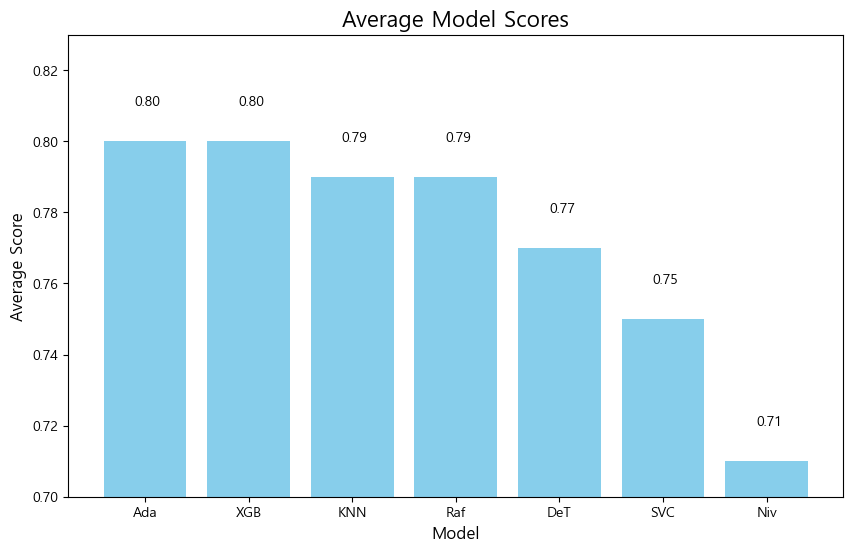

In [5]:
# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_model, avg_score, color='skyblue')
plt.ylim(0.7, 0.83)
# Add data labels on top of each bar
for bar, score in zip(bars, avg_score):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{score:.2f}', fontsize=10)

# Set plot title and axis labels
plt.title('Average Model Scores', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Score', fontsize=12)

# 그래프 저장
plt.savefig('avg_ml_score.jpg', format='jpg', bbox_inches='tight')

# Display the plot
plt.show()

In [2]:
all_feature_importances = []
# 각 데이터프레임에 대해 AdaBoost 모델 학습과 평가
for i in range(1, 6):
    train_csv_path = f'train_data_{i}.csv'
    test_csv_path = f'test_data_{i}.csv'

    print(f"\n---- Training and Evaluating AdaBoost for {train_csv_path} ----")

    # CSV 파일을 데이터프레임으로 읽기
    df_train = pd.read_csv(train_csv_path)

    # X, y 설정
    y_train = df_train['당뇨유무']
    X_train = df_train.drop('당뇨유무', axis=1)

    # 대응하는 test 데이터셋
    df_test = pd.read_csv(test_csv_path)
    X_test = df_test.drop('당뇨유무', axis=1)
    y_test = df_test['당뇨유무']

    # 특성 중요도 저장
    feature_importances = adaboost_model.feature_importances_
    all_feature_importances.append(feature_importances)

    # 모델에 대한 분류 리포트 출력
    adaboost_report = classification_report(y_test, adaboost_model.predict(X_test))
    print(f"AdaBoost Classification Report for {test_csv_path} (on Test Set):\n", adaboost_report)

# 특성 중요도 평균 계산
average_feature_importances = pd.DataFrame(all_feature_importances).mean()

# 평균 특성 중요도 출력
print("\nAverage Feature Importances across all Models:\n", average_feature_importances)



---- Training and Evaluating AdaBoost for train_data_1.csv ----
AdaBoost Classification Report for test_data_1.csv (on Test Set):
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       738
           1       0.81      0.78      0.79       777

    accuracy                           0.79      1515
   macro avg       0.79      0.79      0.79      1515
weighted avg       0.79      0.79      0.79      1515


---- Training and Evaluating AdaBoost for train_data_2.csv ----
AdaBoost Classification Report for test_data_2.csv (on Test Set):
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       738
           1       0.82      0.79      0.80       777

    accuracy                           0.80      1515
   macro avg       0.80      0.80      0.80      1515
weighted avg       0.80      0.80      0.80      1515


---- Training and Evaluating AdaBoost for train_data_3.csv ----
AdaBoost Classifi

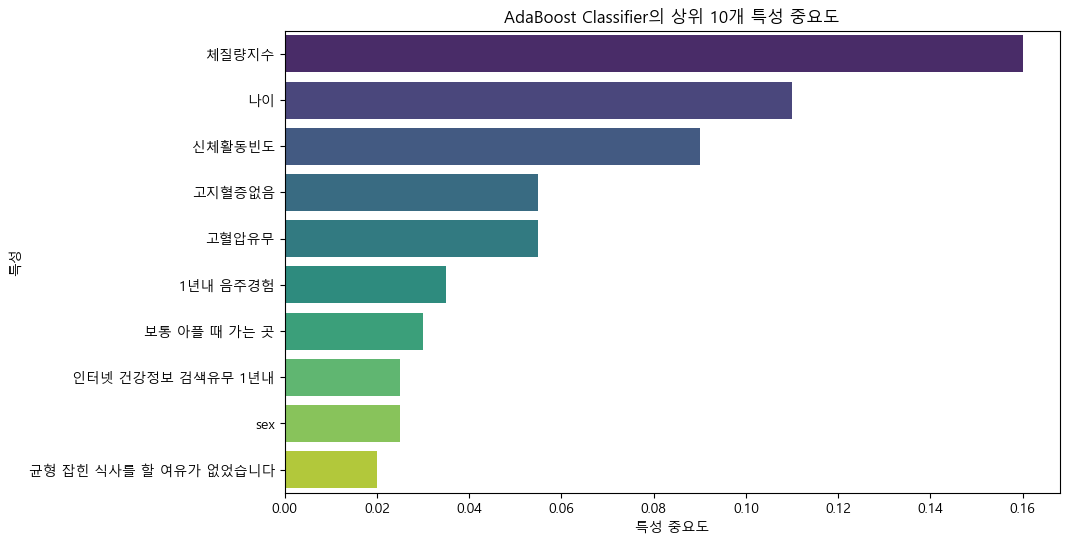

In [3]:

# 특성 중요도를 데이터프레임으로 변환하여 정렬합니다.
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': average_feature_importances})
importance_df['Feature'] = importance_df['Feature'].str.replace(r'_(yes|no)$', '', regex=True)
importance_df = importance_df.groupby('Feature')['Importance'].mean().reset_index()
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 상위 10개의 특성만 선택합니다.
top_10_importance = importance_df.head(10)

# 특성 중요도 시각화를 위한 그래프를 생성합니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_importance, palette='viridis')
plt.title('AdaBoost Classifier의 상위 10개 특성 중요도')
plt.xlabel('특성 중요도')
plt.ylabel('특성')

# 그래프를 이미지 파일로 저장합니다.
# plt.savefig('상위_10_특성_중요도_AdaBoost.jpg', format='jpg', bbox_inches='tight')
plt.show()


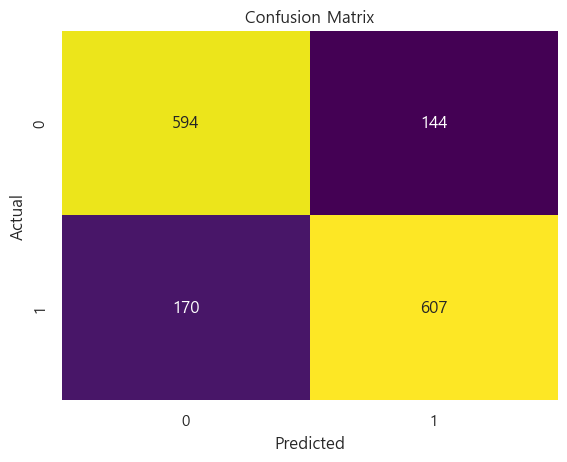

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, adaboost_model.predict(X_test))

# "viridis" 팔레트를 사용하여 히트맵 생성
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 그래프를 이미지 파일로 저장
# plt.savefig('Confusion_Matrix_AdaBoost_viridis.jpg', format='jpg', bbox_inches='tight')

# 그래프를 화면에 출력
plt.show()

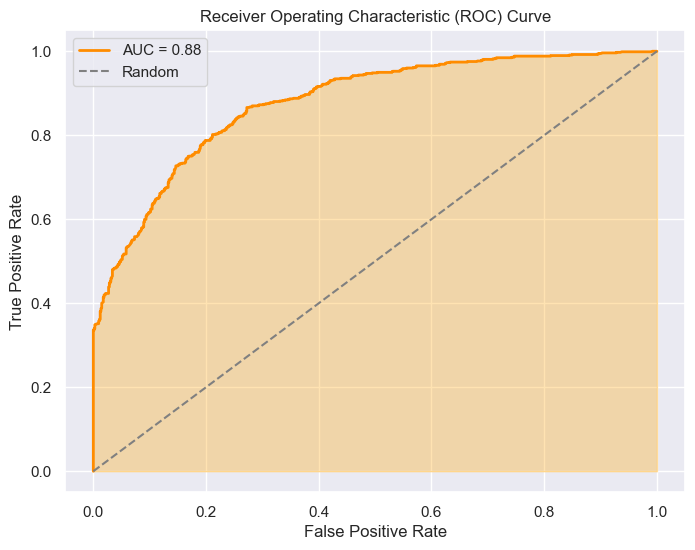

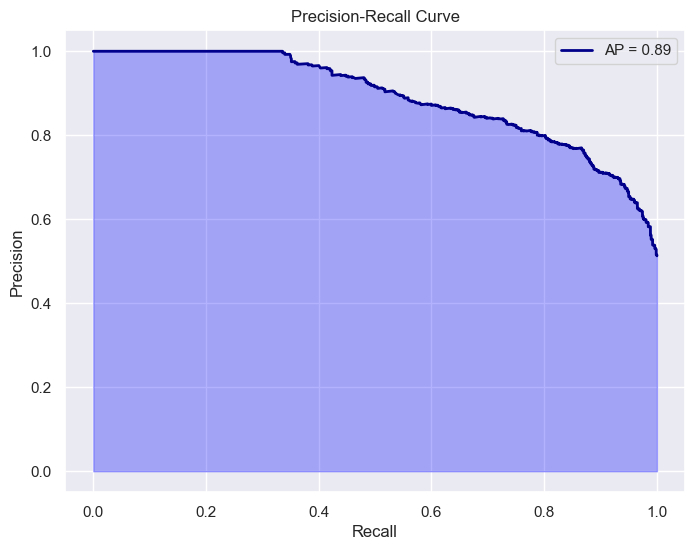

In [73]:
# 예측 확률을 얻기
y_prob = adaboost_model.predict_proba(X_test)[:, 1]


# Seaborn 스타일 설정
sns.set(style="darkgrid")

# ROC 곡선 및 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, 0, tpr, color='orange', alpha=0.3)  # 아래 면적 칠하기
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# 그래프 저장
# plt.savefig('ROC_Adabiist.jpg', format='jpg', bbox_inches='tight')
plt.show()

# Precision-Recall 곡선 및 AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2, label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, 0, precision, color='blue', alpha=0.3)  # 아래 면적 칠하기
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# 그래프 저장
# plt.savefig('Precision-Recall Curve_Adaboost.jpg', format='jpg', bbox_inches='tight')
plt.legend()
plt.show()


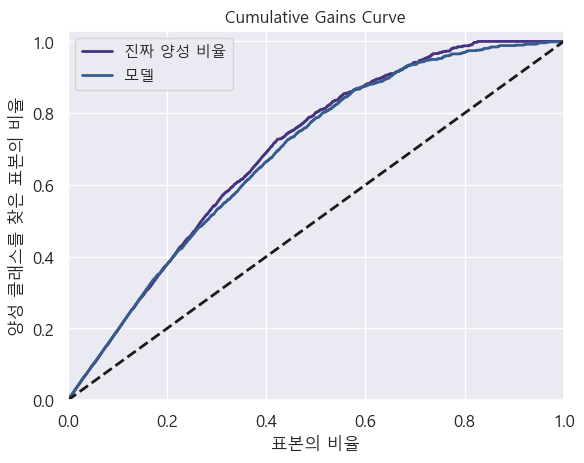

In [87]:
plt.rc('font', family='Malgun Gothic')
# Assuming y_prob is a 1D array
y_prob_reshaped = np.column_stack((1 - y_prob, y_prob))

# Cumulative Gain Curve
skplt.metrics.plot_cumulative_gain(y_test, y_prob_reshaped)

# Manually set the linewidth for all lines in the plot
for line in plt.gca().lines:
    line.set_linewidth(2)  # Adjust linewidth

plt.title('Cumulative Gains Curve')
plt.xlabel('표본의 비율')
plt.ylabel('양성 클래스를 찾은 표본의 비율')

# Manually set the legend labels
plt.legend(['진짜 양성 비율', '모델'])

# Set seaborn palette to "viridis"
sns.set_palette("viridis")

# Adjust y-axis limits
plt.ylim([0, 1.03])

# Save the figure
# plt.savefig('cumulative_gains_curve_Adaboost.jpg', bbox_inches='tight')

# Display the plot
plt.show()

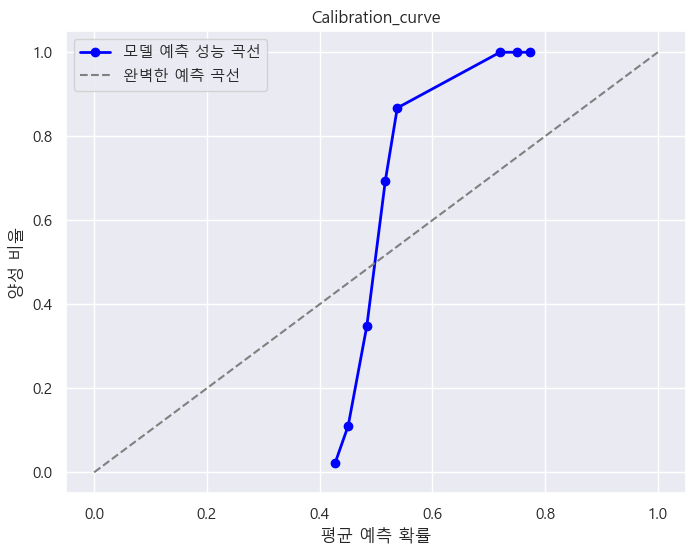

In [76]:
# 예측 확률을 얻기
y_prob = adaboost_model.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=30)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='모델 예측 성능 곡선', color='blue', lw=2)
plt.plot([0, 1], [0, 1], '--', color='gray', label='완벽한 예측 곡선')
plt.xlabel('평균 예측 확률')
plt.ylabel('양성 비율')
plt.title('Calibration_curve')
plt.legend()

# plt.savefig('calibration_curve_Adaboost.jpg')

plt.show()

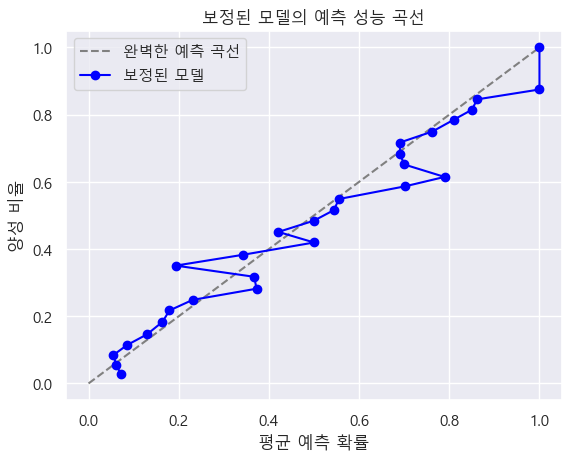

In [77]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import joblib

# Calibrated 모델 생성
calib_model = CalibratedClassifierCV(adaboost_model, method='sigmoid', cv=5)
calib_model.fit(X_train, y_train)
prob = calib_model.predict_proba(X_test)[:, 1]

# Plot the calibration curve
x_p, y_p = calibration_curve(y_test, prob, n_bins=30)
plt.plot([0, 1], [0, 1], label='완벽한 예측 곡선', linestyle='--', color='gray')
plt.plot(x_p, y_p, label='보정된 모델', marker='o', color='blue')

# Add title and labels
plt.title('보정된 모델의 예측 성능 곡선')
plt.xlabel('평균 예측 확률')
plt.ylabel('양성 비율')

# Save the calibrated model
joblib.dump(calib_model, 'calib_model.pkl')

# Save the plot as an image
plt.legend()
# plt.savefig('calibration_curve_calibrated_1st_model.png')

# Show the plot
plt.show()


# calib모델 다시 돌리기

In [7]:
calib_model = joblib.load('calib_model.pkl')
# 각 데이터프레임에 대해 Calibrated 모델 학습과 평가
for i in range(1, 5):
    train_csv_path = f'train_data_{i}.csv'
    test_csv_path = f'test_data_{i}.csv'

    print(f"\n---- Training and Evaluating Calibrated Model for {train_csv_path} ----")

    # CSV 파일을 데이터프레임으로 읽기
    df_train = pd.read_csv(train_csv_path)

    # X, y 설정
    y_train = df_train['당뇨유무']
    X_train = df_train.drop('당뇨유무', axis=1)

    # 대응하는 test 데이터셋
    df_test = pd.read_csv(test_csv_path)
    X_test = df_test.drop('당뇨유무', axis=1)
    y_test = df_test['당뇨유무']

    # Calibrated 모델에서 예측 확률을 얻기
    calib_prob = calib_model.predict_proba(X_test)[:, 1]

    # 모델에 대한 분류 리포트 출력
    calib_report = classification_report(y_test, calib_model.predict(X_test))
    print(f"Calibrated Model Classification Report for {test_csv_path} (on Test Set):\n", calib_report)


---- Training and Evaluating Calibrated Model for train_data_1.csv ----
Calibrated Model Classification Report for test_data_1.csv (on Test Set):
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       738
           1       0.80      0.79      0.80       777

    accuracy                           0.79      1515
   macro avg       0.79      0.79      0.79      1515
weighted avg       0.79      0.79      0.79      1515


---- Training and Evaluating Calibrated Model for train_data_2.csv ----
Calibrated Model Classification Report for test_data_2.csv (on Test Set):
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       738
           1       0.81      0.79      0.80       777

    accuracy                           0.80      1515
   macro avg       0.80      0.80      0.80      1515
weighted avg       0.80      0.80      0.80      1515


---- Training and Evaluating Calibrated Model for

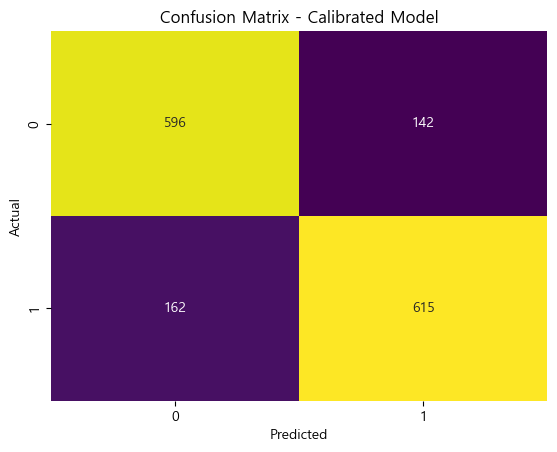

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calibrated 모델에서 예측 확률을 얻기
calib_prob = calib_model.predict_proba(X_test)[:, 1]

# 혼동 행렬 생성
calib_predictions = calib_prob > 0.5  # 이진 분류의 경우, 임계값을 0.5로 설정
cm = confusion_matrix(y_test, calib_predictions)

# "viridis" 팔레트를 사용하여 히트맵 생성
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix - Calibrated Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 그래프를 이미지 파일로 저장
# plt.savefig('Confusion_Matrix_Calibrated_Model_viridis.jpg', format='jpg', bbox_inches='tight')

# 그래프를 화면에 출력
plt.show()


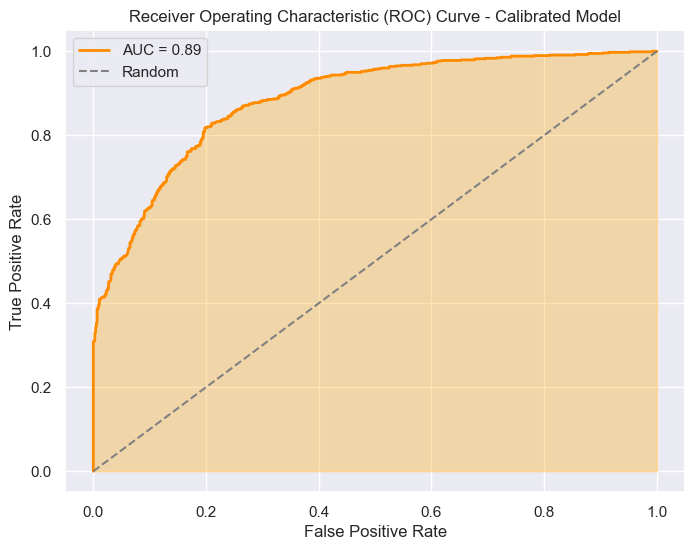

In [13]:
# Calibrated 모델에서 예측 확률 얻기
calib_prob = calib_model.predict_proba(X_test)[:, 1]


# Seaborn 스타일 설정
sns.set(style="darkgrid")

# ROC 곡선 및 AUC
fpr, tpr, thresholds = roc_curve(y_test, calib_prob)
roc_auc = roc_auc_score(y_test, calib_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.fill_between(fpr, 0, tpr, color='orange', alpha=0.3)  # 아래 면적 칠하기
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Calibrated Model')
plt.legend()

# 그래프 저장
# plt.savefig('Calibrated Model ROC Curve.jpg', format='jpg', bbox_inches='tight')
plt.show()

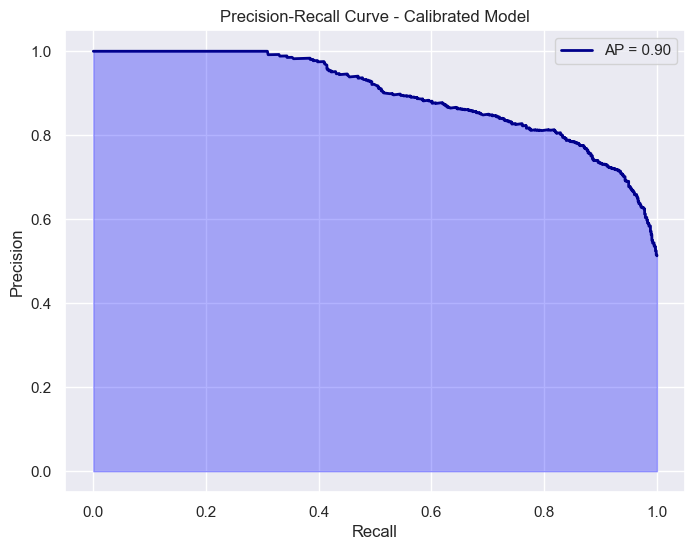

In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Seaborn 스타일 설정
sns.set(style="darkgrid")

# Precision-Recall 곡선 및 AUC
precision, recall, thresholds = precision_recall_curve(y_test, calib_prob)
average_precision = average_precision_score(y_test, calib_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkblue', lw=2, label=f'AP = {average_precision:.2f}')
plt.fill_between(recall, 0, precision, color='blue', alpha=0.3)  # 아래 면적 칠하기
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Calibrated Model')
plt.legend()
# plt.savefig('Precision_Recall_Curve_Calibrated_Model.jpg', format='jpg', bbox_inches='tight')
plt.show()

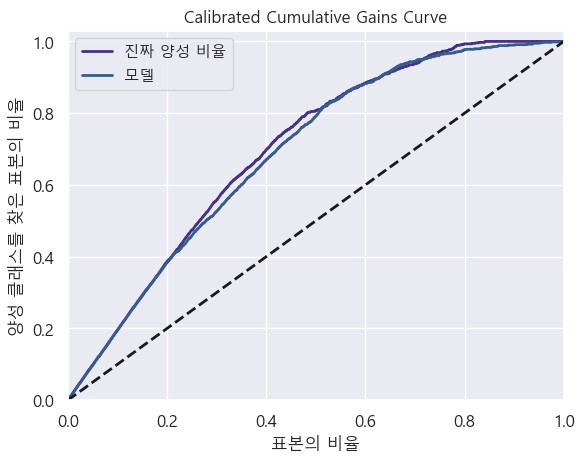

In [17]:
plt.rc('font', family='Malgun Gothic')
# Assuming y_prob is a 1D array
calib_y_prob_reshaped = np.column_stack((1 - calib_prob, calib_prob))

# Cumulative Gain Curve
skplt.metrics.plot_cumulative_gain(y_test, calib_y_prob_reshaped)

# Manually set the linewidth for all lines in the plot
for line in plt.gca().lines:
    line.set_linewidth(2)  # Adjust linewidth

plt.title('Calibrated Cumulative Gains Curve')
plt.xlabel('표본의 비율')
plt.ylabel('양성 클래스를 찾은 표본의 비율')

# Manually set the legend labels
plt.legend(['진짜 양성 비율', '모델'])

# Set seaborn palette to "viridis"
sns.set_palette("viridis")

# Adjust y-axis limits
plt.ylim([0, 1.03])

# Save the figure
# plt.savefig('calibrated_cumulative_gains_curve.png', bbox_inches='tight')

# Display the plot
plt.show()

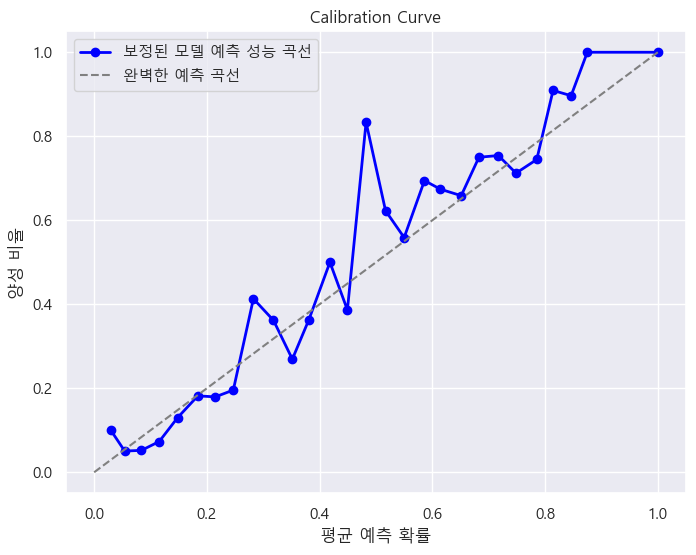

In [18]:
from sklearn.calibration import calibration_curve

# Calibrated 모델 불러오기
# calib_model = joblib.load('calib_model.pkl')
calib_prob = calib_model.predict_proba(X_test)[:, 1]

# Sample Probabilities from Calibrated Model
calib_prob_true, calib_prob_pred = calibration_curve(y_test, calib_prob, n_bins=30)

plt.figure(figsize=(8, 6))
plt.plot(calib_prob_pred, calib_prob_true, marker='o', label='보정된 모델 예측 성능 곡선', color='blue', lw=2)
plt.plot([0, 1], [0, 1], '--', color='gray', label='완벽한 예측 곡선')
plt.xlabel('평균 예측 확률')
plt.ylabel('양성 비율')
plt.title('Calibration Curve')
plt.legend()

# Save the figure
# plt.savefig('calibration_curve_last.jpg')

# Display the plot
plt.show()
